In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.datasets import mnist
import random

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_val, y_val = X_train[50000:60000,:], y_train[50000:60000]
X_train, y_train = X_train[:50000,:], y_train[:50000]
print(X_train.shape)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [3]:
#reshape input into N = number of samples, W = H = 28, D = 1

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_val = X_val.reshape(X_val.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [4]:
Y_train = to_categorical(y_train, 10)
Y_val = to_categorical(y_val, 10)
Y_test = to_categorical(y_test, 10)
print(y_train[0]) #initial data
print(Y_train[0]) #one hot encoded data

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [5]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='sigmoid', input_shape=(28,28,1))) #convolutional layer with 32 kernels, kernel size 3x3, sigmoid activation
model.add(Conv2D(32, (3, 3), activation='sigmoid'))
model.add(MaxPooling2D(pool_size=(2,2))) #max pooling with size 2x2
model.add(Flatten()) #flatten from tensor into vector
model.add(Dense(128, activation='sigmoid')) #fully connected layer with 128 nodes, sigmoid activation for output in the form of a probability value between 0 and 1
model.add(Dense(10, activation='softmax')) #output layer with 10 nodes, softmax function for probability distribution output
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy']) #categorical cross entropy loss; mini-batch gradient descent for optimizing loss function

H = model.fit(X_train, Y_train, validation_data=(X_val, Y_val),batch_size=32, epochs=10, verbose=1)

Epoch 1/10


C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7773 - loss: 0.7406 - val_accuracy: 0.9809 - val_loss: 0.0713
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9835 - loss: 0.0633 - val_accuracy: 0.9837 - val_loss: 0.0575
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9889 - loss: 0.0391 - val_accuracy: 0.9862 - val_loss: 0.0461
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9930 - loss: 0.0252 - val_accuracy: 0.9859 - val_loss: 0.0463
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9955 - loss: 0.0172 - val_accuracy: 0.9884 - val_loss: 0.0419
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9969 - loss: 0.0118 - val_accuracy: 0.9867 - val_loss: 0.0432
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9985 - loss: 0.0076 - val_accuracy: 0.9864 - val_loss: 0.0459
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9988 - loss: 0.0057 - val

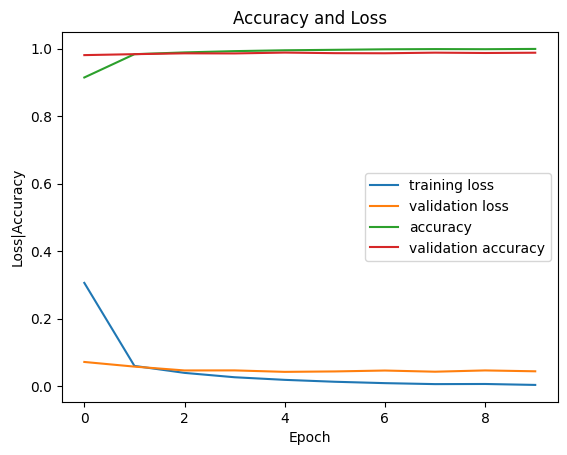

In [6]:
fig = plt.figure()
numOfEpoch = 10
plt.plot(np.arange(0, numOfEpoch), H.history['loss'], label='training loss')
plt.plot(np.arange(0, numOfEpoch), H.history['val_loss'], label='validation loss')
plt.plot(np.arange(0, numOfEpoch), H.history['accuracy'], label='accuracy')
plt.plot(np.arange(0, numOfEpoch), H.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss|Accuracy')
plt.legend()

In [7]:
#evaluate on test set: test loss and test accuracy
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.038105349987745285, 0.9878000020980835]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted value: 2


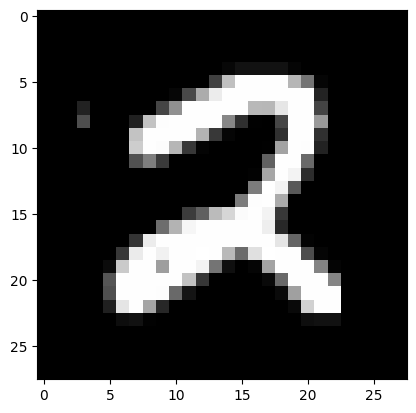

In [14]:
#predict image
sample_no = random.randrange(1, 10000)
plt.imshow(X_test[sample_no].reshape(28,28), cmap='gray')
y_predict = model.predict(X_test[sample_no].reshape(1,28,28,1))
print('Predicted value:', np.argmax(y_predict))